## **Problem Overview**

Financial literacy, the ability to understand principles and calculations
related to inflation, interest and specifically compound interest, could be
as low as 50% across South Africans.

While research is sparce, a 2020 study found that only 28% of South African respondents correctly
answered questions relating to compound interest and most did not understand how compound
interest increased money saved over time.

Alternatively, compound interest mixed with debt can have a debilitating impact on everyday South
Africans, particularly in light of our country’s overindebtedness and sky-high interest rates offered to
underprivileged people.

### **Objective**:

- The aim is to understand the financial literacy of South African and what factors cause low financial literacy

Data Description
- [Variable names](https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/712/data-dictionary/F11)

In [2]:
import pandas as pd

In [3]:
df=pd.read_stata("Adult_W5_Anon_V1.0.0.dta")

df.to_csv("Adult_W5_Anon_V1.0.0.csv", index=False)

In [103]:
data = pd.read_csv("Adult_W5_Anon_V1.0.0.csv")
data.head()

C:\Users\pales\AppData\Local\Temp\ipykernel_17184\338060721.py:1: DtypeWarning: Columns (10,15,21,22,26,28,38,39,48,61,64,70,73,79,82,91,100,109,118,126,127,129,133,135,136,137,138,140,141,142,143,144,145,146,147,149,150,151,152,153,154,155,156,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,176,177,178,179,180,181,182,185,186,187,188,189,190,223,224,230,235,257,262,266,269,276,284,285,286,287,288,290,294,296,297,298,300,302,304,305,306,308,319,320,321,322,323,324,325,331,332,336,338,340,341,342,343,344,347,348,349,350,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,370,371,372,373,374,375,376,377,378,380,381,383,384,385,386,388,389,390,394,395,396,397,398,399,400,401,402,403,405,408,409,411,413,414,415,416,417,418,424,426,429,430,440,441,442,444,445,449,450,453,455,457,459,461,463,471,475,477,479,481,483,485,487,489,491,493,497,498,506,508,510,511,512,513,515,517,519,520,521,522,523,524,525,526,527,528,529,530,531,532,534,536,537,539,540,541,544,546,548

,w5_a_outcome,w5_hhid,pid,w5_a_intrv_d,w5_a_intrv_m,w5_a_intrv_y,w5_a_refexpl,w5_a_refexpl_o,w5_a_refint,w5_a_refgen,...,w5_a_intlng10,w5_a_intlng11,w5_a_intlng_o,w5_a_intresp,w5_a_intrespact,w5_a_intresphear,w5_a_intrespque,w5_a_intresppid1,w5_a_intresppid2,w5_a_intresppid3
0,Successfully Interviewed,500000,640576,3rd,October,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
1,Successfully Interviewed,500001,405734,2nd,June,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Neither hostile nor friendly,Somewhat attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
2,Successfully Interviewed,500002,305961,15th,August,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
3,Successfully Interviewed,500002,731651,15th,August,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN
4,Successfully Interviewed,500003,303668,14th,March,2017.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Friendly,Very attentive,No other person within hearing range at any time,No,NaN,NaN,NaN


- school level
- income
- population group
- questions in the survey
- age

columns_to_keep=["rom which sample did this respondent originate?(w5_a_sample)","Gender (w5_a_gen)","Population group (w5_a_popgrp)","Province respondent born in (w5_a_brnprov)",
Are you currently being paid a regular wage/salary; part time/full time? (w5_a_em1)","Highest school grade completed (w5_a_edschgrd)","Income classification of household (w5_a_fwbrelinc)","Has a home loan/bond? (w5_a_dtbnd)","Has a personal loan from a bank? (w5_a_dtbnk)","If you borrow R100, which is the lower amount to pay back:R105 or R100+3%? (w5_a_flint)"," At 15% interest per year how much will the bank add in the 2nd year (w5_a_flcomp1)",'With R100 in a 10 % p.a. savings account, what will you have after 5 yrs? (w5_a_flcomp2)']

In [104]:
columns_to_keep=["w5_a_sample", "w5_a_gen", "w5_a_popgrp", "w5_a_brnprov",
                 "w5_a_em1", "w5_a_edschgrd", "w5_a_fwbrelinc", "w5_a_dtbnd",
                 "w5_a_dtbnk", "w5_a_flint", "w5_a_flcomp1", "w5_a_flcomp2"]

data = data[columns_to_keep]

In [105]:
data.head()

,w5_a_sample,w5_a_gen,w5_a_popgrp,w5_a_brnprov,w5_a_em1,w5_a_edschgrd,w5_a_fwbrelinc,w5_a_dtbnd,w5_a_dtbnk,w5_a_flint,w5_a_flcomp1,w5_a_flcomp2
0,2017 sample,Male,Coloured,Eastern Cape,Yes,Grade 12/Std. 10/Form 5/Matric/Senior Certificate,Average income,Yes,No,R100 plus three percent,More,More than R150
1,2008 sample,Male,African,NaN,No,Grade 10/Std. 8/Form 3,Much below average income,No,No,Donât know,Donât know,Donât know
2,2008 sample,Female,African,Mpumalanga,No,Grade 11/Std. 9/Form 4,Much below average income,No,No,R100 plus three percent,More,More than R150
3,2008 sample,Male,African,NaN,No,Grade 11/Std. 9/Form 4,Much below average income,No,No,R100 plus three percent,The same,More than R150
4,2008 sample,Male,African,NaN,No,No schooling,Much below average income,No,No,R105,The same,Less than R150


In [106]:
column_mapping = {
    "w5_a_sample": "Sample",
    "w5_a_gen" :"Gender",
    "w5_a_popgrp": "Population_Group",
    "w5_a_brnprov": "Province",
    "w5_a_em1": "Employment_Status",
    "w5_a_edschgrd": "Highest_School_Grade_Completed",
    "w5_a_fwbrelinc": "Income_Classification",
    "w5_a_dtbnd": "Has_Home_Loan/Bond",
    "w5_a_dtbnk": "Has_Personal_Loan_from_Bank",
    "w5_a_flint": "Interest_Rate_Understanding",
    "w5_a_flcomp1": "Compound_Interest_Understanding",
    "w5_a_flcomp2": "Savings_Understanding"
}
data.rename(columns=column_mapping, inplace=True)
data.head()

,Sample,Gender,Population_Group,Province,Employment_Status,Highest_School_Grade_Completed,Income_Classification,Has_Home_Loan/Bond,Has_Personal_Loan_from_Bank,Interest_Rate_Understanding,Compound_Interest_Understanding,Savings_Understanding
0,2017 sample,Male,Coloured,Eastern Cape,Yes,Grade 12/Std. 10/Form 5/Matric/Senior Certificate,Average income,Yes,No,R100 plus three percent,More,More than R150
1,2008 sample,Male,African,NaN,No,Grade 10/Std. 8/Form 3,Much below average income,No,No,Donât know,Donât know,Donât know
2,2008 sample,Female,African,Mpumalanga,No,Grade 11/Std. 9/Form 4,Much below average income,No,No,R100 plus three percent,More,More than R150
3,2008 sample,Male,African,NaN,No,Grade 11/Std. 9/Form 4,Much below average income,No,No,R100 plus three percent,The same,More than R150
4,2008 sample,Male,African,NaN,No,No schooling,Much below average income,No,No,R105,The same,Less than R150


In [107]:
data.columns

Index(['Sample', 'Gender', 'Population_Group', 'Province', 'Employment_Status',
       'Highest_School_Grade_Completed', 'Income_Classification',
       'Has_Home_Loan/Bond', 'Has_Personal_Loan_from_Bank',
       'Interest_Rate_Understanding', 'Compound_Interest_Understanding',
       'Savings_Understanding'],
      dtype='object')

In [108]:
cols_to_fix = ["Interest_Rate_Understanding", "Compound_Interest_Understanding", "Savings_Understanding"]

for col in cols_to_fix:
    data[col] = data[col].replace("Donât know", "Don't know")


In [109]:
data.shape

(30110, 12)

**Data Overview**

- Sample Size: 23,590 respondents

Focus Areas:
- Compound Interest Understanding
- Savings Understanding
- Interest Rate Understanding

Key Indicators:

- Income Level
- Employment Status
- Loan Status

This dataset allows us to explore financial literacy patterns and understand how debt, savings, and demographics interact.


In [72]:
data.dtypes

Sample                             object
Gender                             object
Population_Group                   object
Province                           object
Employment_Status                  object
Highest_School_Grade_Completed     object
Income_Classification              object
Has_Home_Loan/Bond                 object
Has_Personal_Loan_from_Bank        object
Interest_Rate_Understanding        object
Compound_Interest_Understanding    object
Savings_Understanding              object
dtype: object

In [73]:
data['Compound_Interest_Understanding'].value_counts()

Compound_Interest_Understanding
More          13285
The same       7627
Don't know     2827
Refused         135
Missing          17
Name: count, dtype: int64

In [110]:
mapping = {
    "More": "Yes",
    "The same": "No",
    "Don't know": "No",
    "Refused ": "No",
}
data['Compound_Interest_Understanding'].value_counts()

# Recode in place
data["Compound_Interest_Understanding"] = data["Compound_Interest_Understanding"].map(mapping)

# Drop missing
data = data.dropna(subset=["Compound_Interest_Understanding"])

# Check counts
print(data["Compound_Interest_Understanding"].value_counts())

Compound_Interest_Understanding
Yes    13285
No     10454
Name: count, dtype: int64


In [111]:
# Define mapping
mapping = {
    "R100 plus three percent": "Yes",
    "R105": "No",
    "Don't know": "No",
    "Refused ": "No",
}

# Recode in place
data["Interest_Rate_Understanding"] = data["Interest_Rate_Understanding"].map(mapping)

# Drop missing
data = data.dropna(subset=["Interest_Rate_Understanding"])

# Check counts
print(data["Interest_Rate_Understanding"].value_counts())


Interest_Rate_Understanding
No     12411
Yes    11179
Name: count, dtype: int64


In [112]:
data["Savings_Understanding"].value_counts()

Savings_Understanding
More than R150    13655
Exactly R150       5760
Don't know         2552
Less than R150     1604
Refused              19
Name: count, dtype: int64

In [113]:
# Define mapping
mapping = {
    "More than R150": "Yes",
    "Exactly R150": "No",
    "Don't know": "No",
    "Less than R150": "No",
    "Refused": "No"
}

# Recode in place
data["Savings_Understanding"] = data["Savings_Understanding"].map(mapping)

# Drop missing
data1 = data.dropna(subset=["Savings_Understanding"])

# Check counts
print(data1["Savings_Understanding"].value_counts())


Savings_Understanding
Yes    13655
No      9935
Name: count, dtype: int64


In [114]:
data = data[~data.isin(['Refused'])].dropna()
data = data[~data.isin(["Don't know"])].dropna()
data = data[~data.isin(['Missing'])].dropna()




In [79]:
data_2008 = data[data["Sample"] == "2008 sample"]
data_2017 = data[data["Sample"] == "2017 sample"]

In [80]:
data['Sample'].value_counts()

Sample
2008 sample    8543
2017 sample     921
Name: count, dtype: int64

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
MONOCLE_COLORS = {
    'primary': '#1A1F2B',     # Deep Navy-Charcoal
    'secondary': '#2B78E4',   # Medium Blue
    'accent1': '#81B5E3',     # Light Sky Blue
    'accent2': '#0A84FF',     # Bright Blue
    'neutral1': "#E7EAEE",    # Very Light Grey
    'neutral2': '#A0A8B9',    # Mid Grey-Blue
    'neutral3': '#666F8C',    # Dark Grey-Blue
    'success': "#069712",     # Green
    'warning': "#EED600",     # Amber
    'danger': "#F70707"       # Red
}




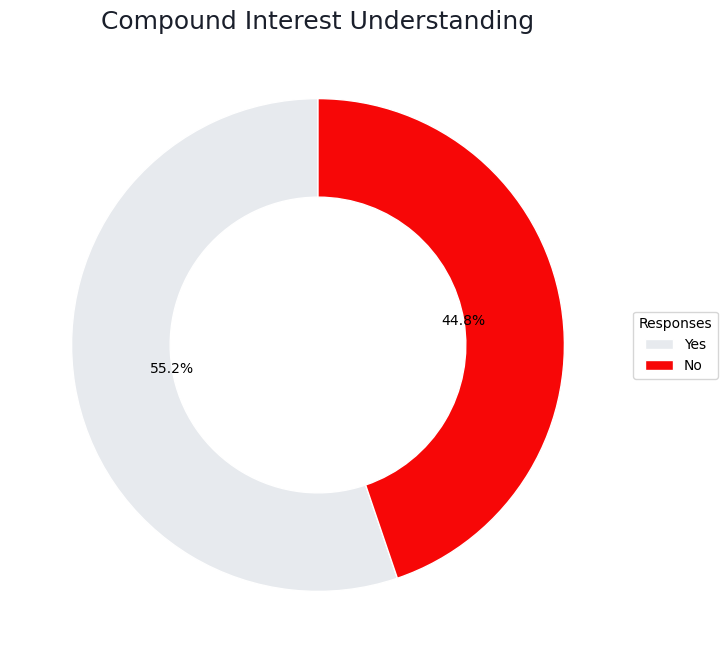

In [133]:
counts = data["Compound_Interest_Understanding"].value_counts()

colors = [
    MONOCLE_COLORS['neutral1'],   # More
    MONOCLE_COLORS['danger'],   # The same (neutral positive)
    MONOCLE_COLORS['warning'],   # Don't know
    MONOCLE_COLORS['neutral3'],  # Refused
    MONOCLE_COLORS['neutral2']   # Missing
]
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    counts,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)

plt.legend(wedges, counts.keys(), title="Responses", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Compound Interest Understanding", fontsize=18, color=MONOCLE_COLORS['primary'])
plt.show()

### **Financial Literacy by Demographics**

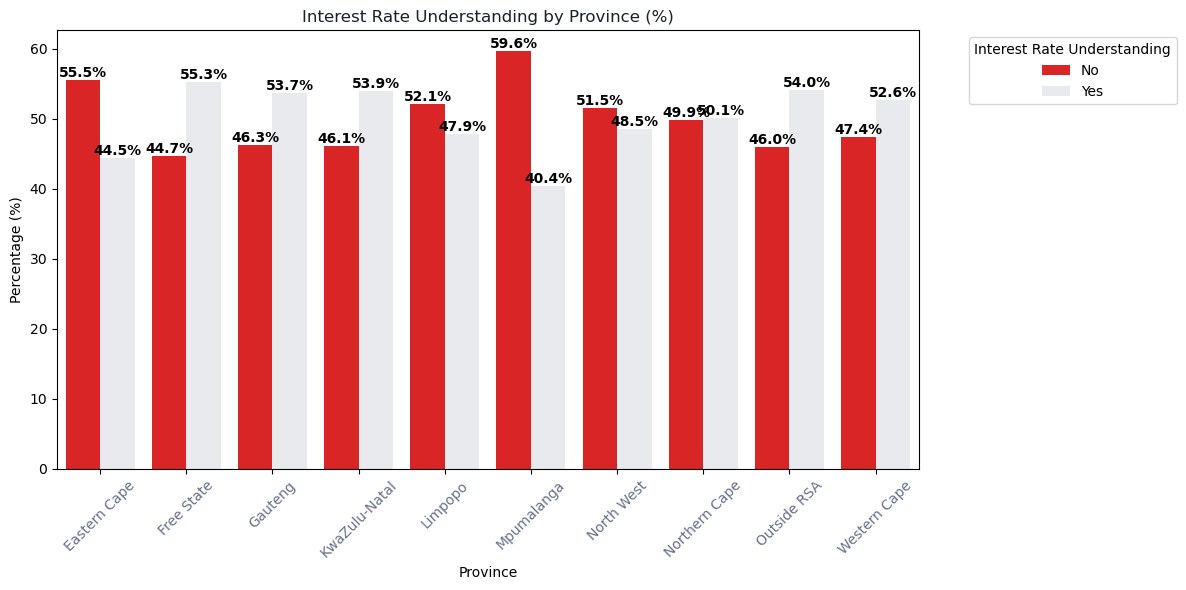

In [135]:
ct_province = pd.crosstab(data["Province"], data["Interest_Rate_Understanding"], normalize="index") * 100

# Prepare data for seaborn
ct_province_reset = ct_province.reset_index()
ct_province_melted = ct_province_reset.melt(id_vars='Province', var_name='Interest_Rate_Understanding', value_name='Percentage')

# Option 1A: Using seaborn with percentage data and labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=ct_province_melted, 
    x="Province", 
    y="Percentage", 
    hue="Interest_Rate_Understanding",
    palette=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1']]
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')

plt.title("Interest Rate Understanding by Province (%)", color=MONOCLE_COLORS['primary'])
plt.ylabel("Percentage (%)")
plt.xlabel("Province")
plt.xticks(rotation=45, color=MONOCLE_COLORS['neutral3'])
plt.legend(title="Interest Rate Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

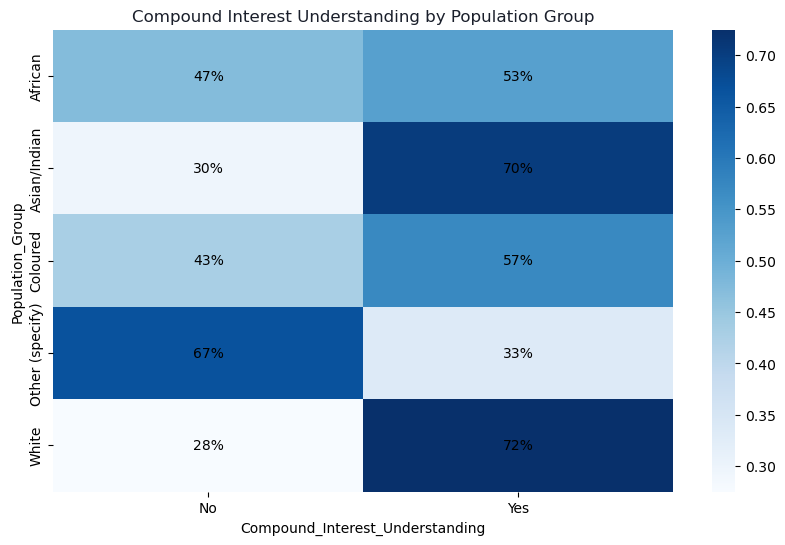

In [136]:
#change font to black
ct = pd.crosstab(data["Population_Group"], data["Compound_Interest_Understanding"], normalize="index")

plt.figure(figsize=(10,6))
sns.heatmap(
    ct,
    annot=True,
    cmap="Blues",
    fmt=".0%",
    annot_kws={"color": "black"} 
)
plt.title("Compound Interest Understanding by Population Group", color=MONOCLE_COLORS['primary'])
plt.show()


**Multivariate (Gender × Income)**

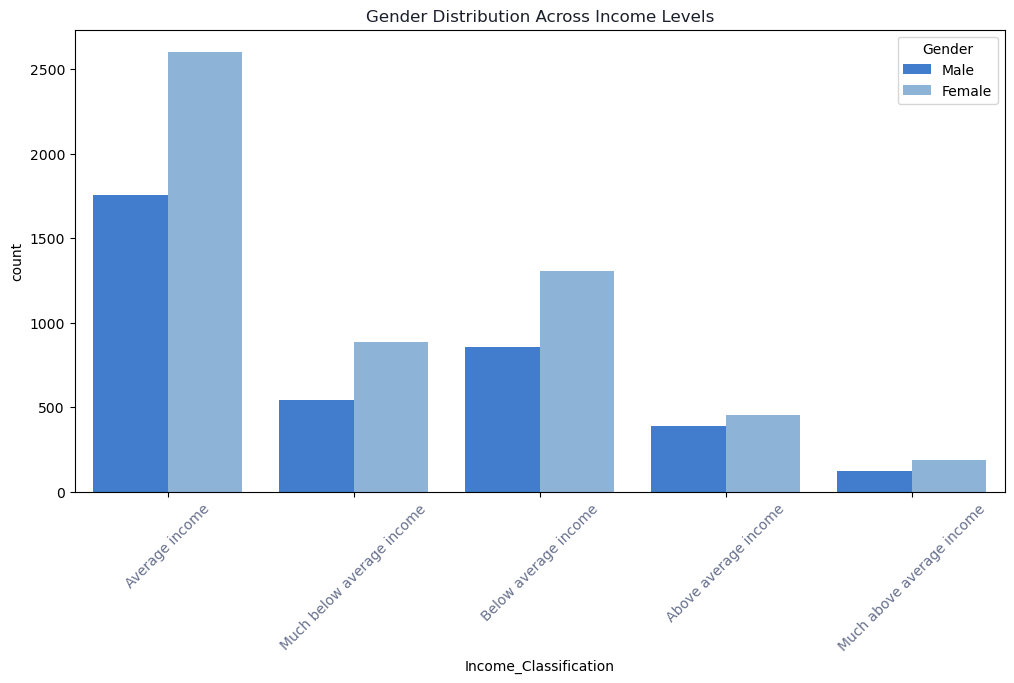

In [137]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=data,
    x="Income_Classification",
    hue="Gender",
    palette=[MONOCLE_COLORS['secondary'], MONOCLE_COLORS['accent1']]
)
plt.title("Gender Distribution Across Income Levels", color=MONOCLE_COLORS['primary'])
plt.xticks(rotation=45, color=MONOCLE_COLORS['neutral3'])
plt.show()

**Who understands vs doesn’t understand**

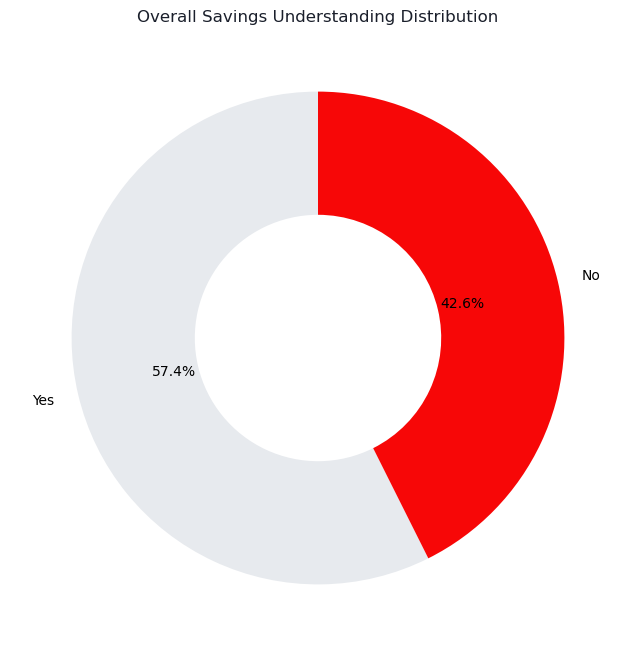

In [138]:
overall_savings = data["Savings_Understanding"].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(overall_savings.values, labels=overall_savings.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90,
                                  wedgeprops=dict(width=0.5))
plt.title("Overall Savings Understanding Distribution", color=MONOCLE_COLORS['primary'])
plt.show()

In [125]:
import numpy as np

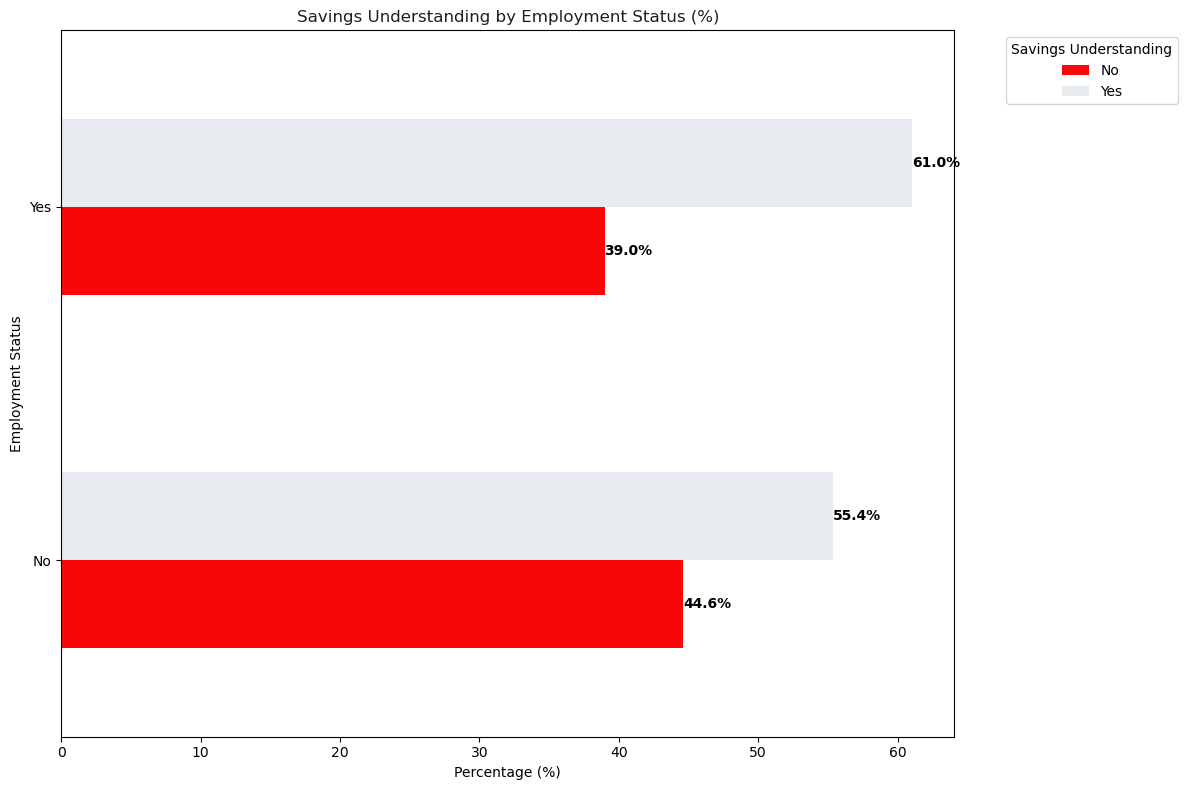

In [140]:
ct = pd.crosstab(data["Employment_Status"], data["Savings_Understanding"], normalize="index") * 100
fig, ax = plt.subplots(figsize=(12, 8))
bars = ct.plot(kind="barh", ax=ax, color=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['warning']])

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')

plt.title("Savings Understanding by Employment Status (%)", color=MONOCLE_COLORS['primary'])
plt.xlabel("Percentage (%)")
plt.ylabel("Employment Status")
plt.legend(title="Savings Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Demographics × Literacy**

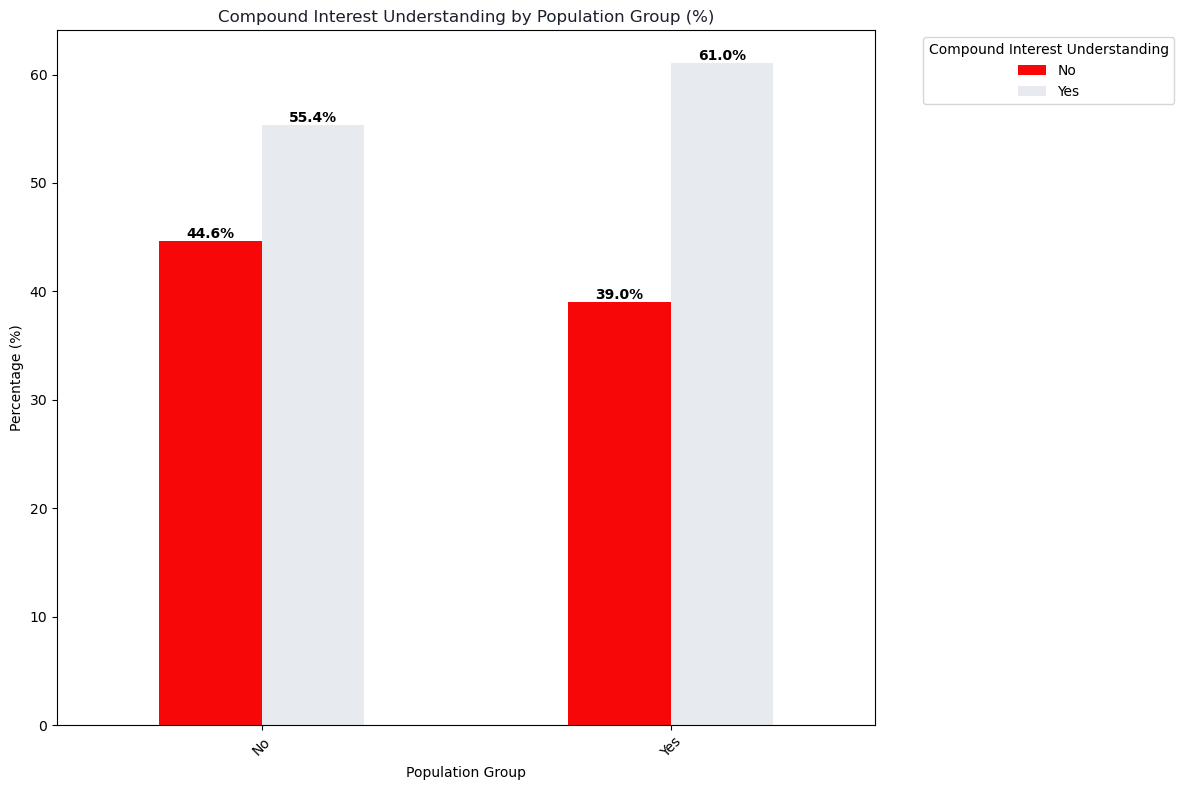

In [141]:
# Option 2: With percentage labels on bars
fig, ax = plt.subplots(figsize=(12, 8))
bars = ct.plot(kind="bar", ax=ax, color=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['warning']])

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')

plt.title("Compound Interest Understanding by Population Group (%)", color=MONOCLE_COLORS['primary'])
plt.ylabel("Percentage (%)")
plt.xlabel("Population Group")
plt.legend(title="Compound Interest Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_17184\88291621.py:10: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


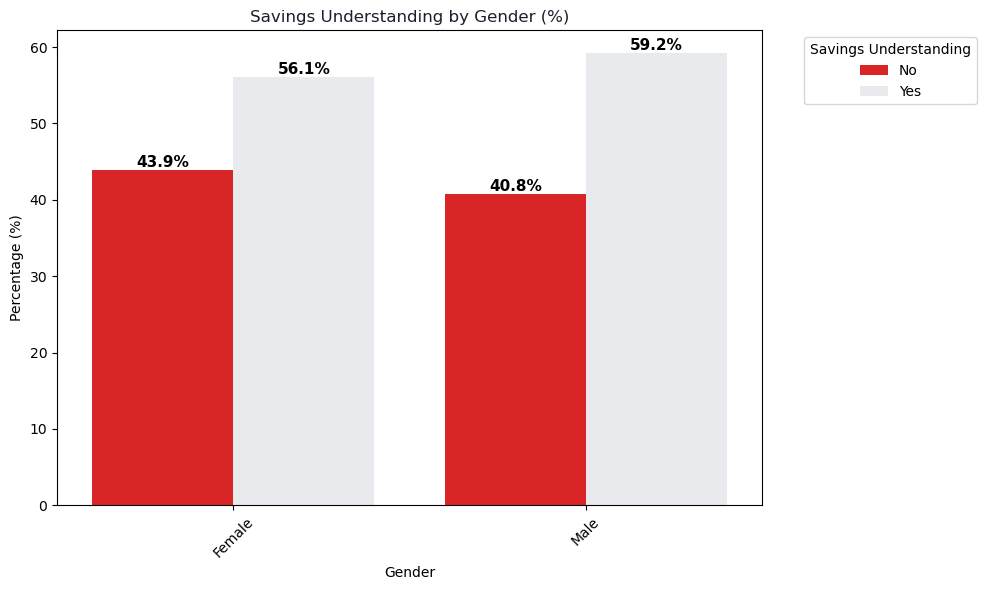

In [ ]:
# Calculate the crosstab with percentages
ct = pd.crosstab(data["Gender"], data["Savings_Understanding"], normalize="index") * 100

ct_reset = ct.reset_index()
ct_melted = ct_reset.melt(id_vars='Gender', var_name='Savings_Understanding', value_name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ct_melted, 
    x="Gender", 
    y="Percentage", 
    hue="Savings_Understanding",
    palette=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['warning']]
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

plt.title("Savings Understanding by Gender (%)", color=MONOCLE_COLORS['primary'])
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.legend(title="Savings Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\pales\AppData\Local\Temp\ipykernel_17184\1471315149.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


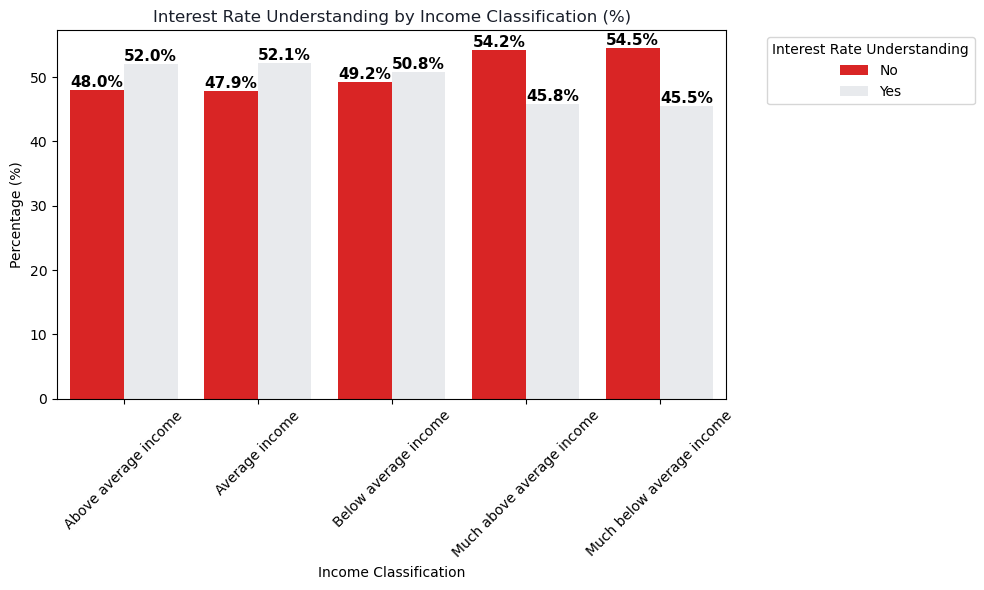

In [163]:
# Calculate the crosstab with percentages
ct = pd.crosstab(data["Income_Classification"], data["Interest_Rate_Understanding"], normalize="index") * 100

ct_reset = ct.reset_index()
ct_melted = ct_reset.melt(id_vars='Income_Classification', var_name='Interest_Rate_Understanding', value_name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ct_melted, 
    x="Income_Classification", 
    y="Percentage", 
    hue="Interest_Rate_Understanding",
    palette=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['warning']]
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

plt.title("Interest Rate Understanding by Income Classification (%)", color=MONOCLE_COLORS['primary'])
plt.ylabel("Percentage (%)")
plt.xlabel("Income Classification")
plt.xticks(rotation=45)
plt.legend(title="Interest Rate Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\pales\AppData\Local\Temp\ipykernel_17184\3791015566.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


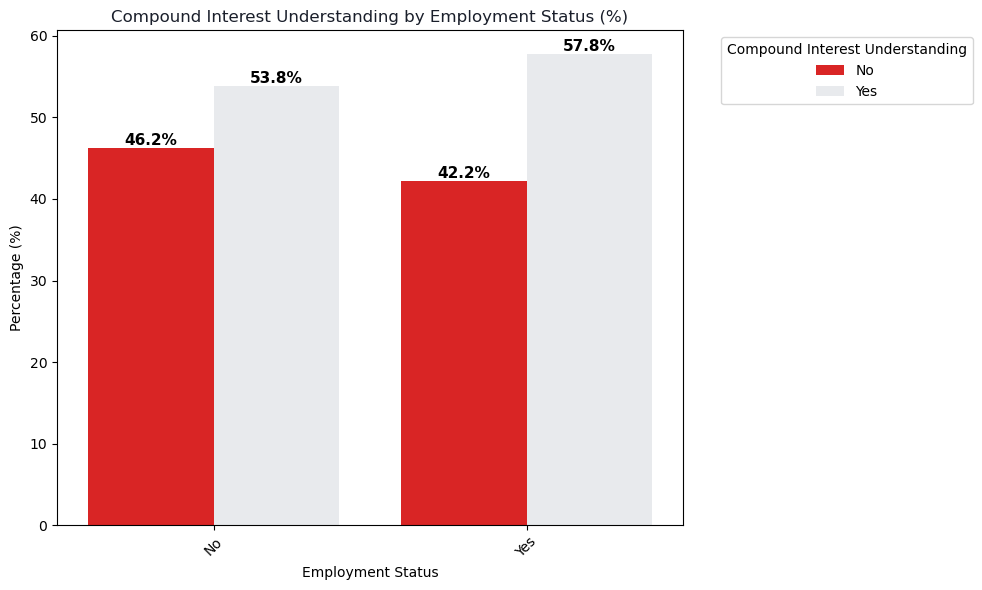

In [164]:
# Calculate the crosstab with percentages
ct = pd.crosstab(data["Employment_Status"], data["Compound_Interest_Understanding"], normalize="index") * 100

ct_reset = ct.reset_index()
ct_melted = ct_reset.melt(id_vars='Employment_Status', var_name='Compound_Interest_Understanding', value_name='Percentage')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ct_melted, 
    x="Employment_Status", 
    y="Percentage", 
    hue="Compound_Interest_Understanding",
    palette=[MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['warning']]
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

plt.title("Compound Interest Understanding by Employment Status (%)", color=MONOCLE_COLORS['primary'])
plt.ylabel("Percentage (%)")
plt.xlabel("Employment Status")
plt.xticks(rotation=45)
plt.legend(title="Compound Interest Understanding", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


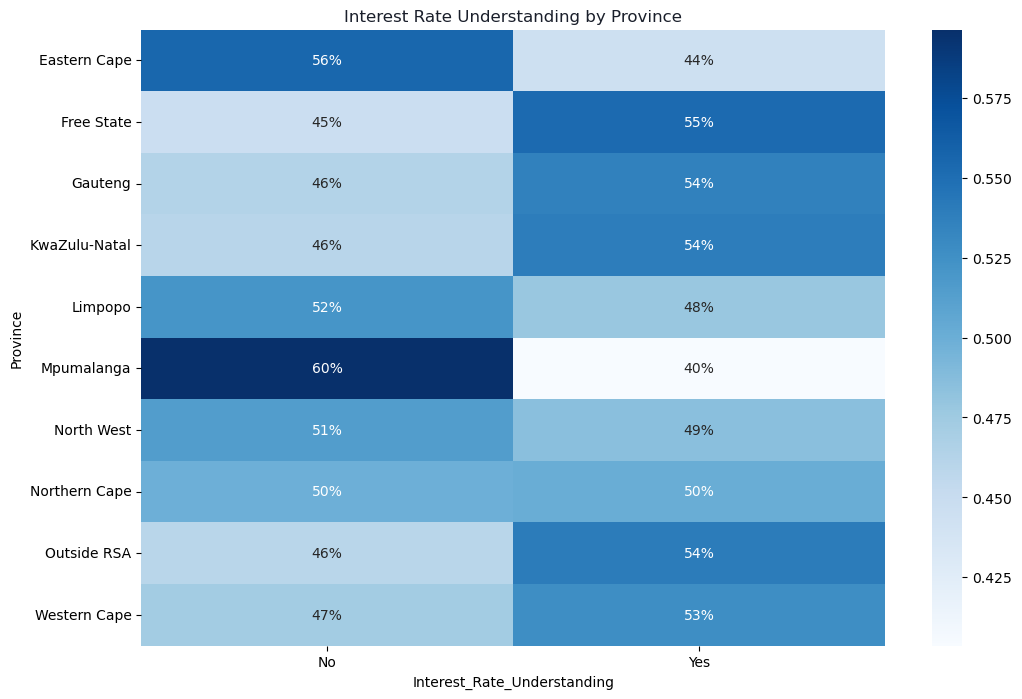

In [147]:
ct = pd.crosstab(data["Province"], data["Interest_Rate_Understanding"], normalize="index")

plt.figure(figsize=(12,8))
sns.heatmap(ct, annot=True, cmap="Blues", fmt=".0%")
plt.title("Interest Rate Understanding by Province", color=MONOCLE_COLORS['primary'])
plt.show()


In [33]:
data_2008 = data[data["Sample"] == "2008 sample"]
data_2017 = data[data["Sample"] == "2017 sample"]


In [34]:
counts_2008 = data_2008["Compound_Interest_Understanding"].value_counts()
counts_2017 = data_2017["Compound_Interest_Understanding"].value_counts()


In [39]:
data['Has_Home_Loan/Bond'].value_counts()

Has_Home_Loan/Bond
No            22971
Yes             567
Refused          50
Don't know        2
Name: count, dtype: int64

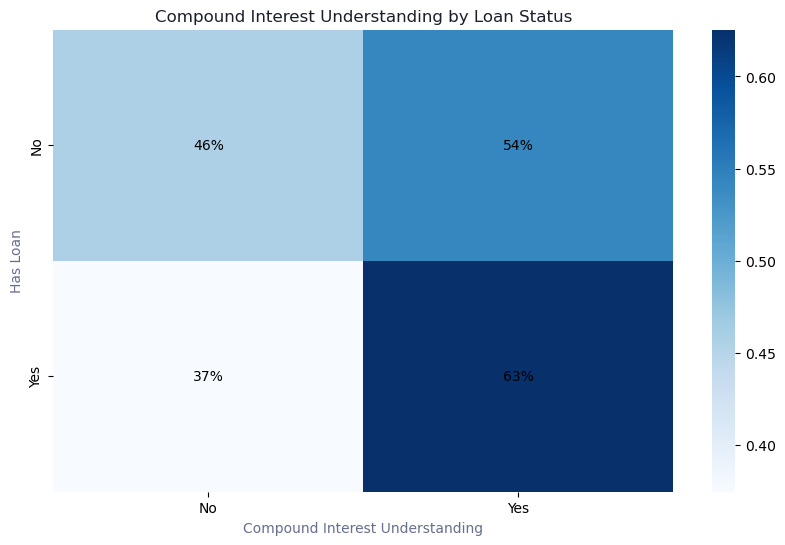

In [148]:
def loan_status(row):
    if row['Has_Home_Loan/Bond'] == 'Yes' or row['Has_Personal_Loan_from_Bank'] == 'Yes':
        return 'Yes'
    elif row['Has_Home_Loan/Bond'] in ["Refused", "Don't know"] or row['Has_Personal_Loan_from_Bank'] in ["Refused", "Don't know"]:
        return 'Unknown'
    else:
        return 'No'

data['Has_Loan'] = data.apply(loan_status, axis=1)

# Crosstab and normalize for compound interest understanding
ct_loan = pd.crosstab(data['Has_Loan'], data['Compound_Interest_Understanding'], normalize='index')

plt.figure(figsize=(10,6))
sns.heatmap(
    ct_loan,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    annot_kws={"color": "black"} 
)
plt.title("Compound Interest Understanding by Loan Status", color=MONOCLE_COLORS['primary'])
plt.ylabel("Has Loan", color=MONOCLE_COLORS['neutral3'])
plt.xlabel("Compound Interest Understanding", color=MONOCLE_COLORS['neutral3'])
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_17184\2429728676.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(


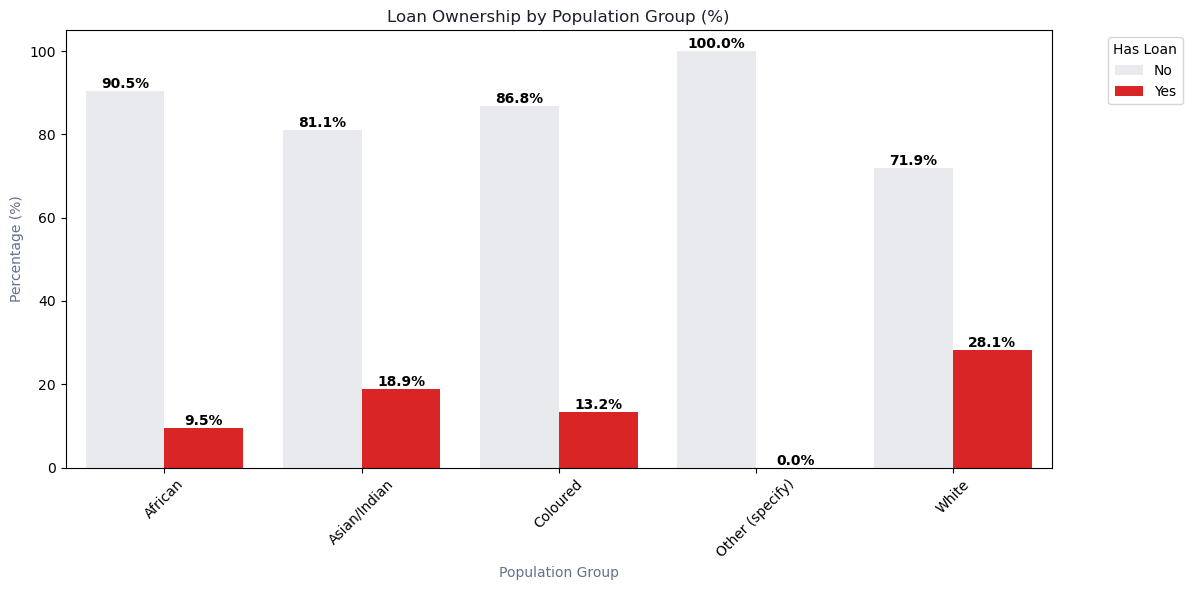

In [152]:
ct = pd.crosstab(data['Population_Group'], data['Has_Loan'], normalize="index") * 100

ct_reset = ct.reset_index()
ct_melted = ct_reset.melt(id_vars='Population_Group', var_name='Has_Loan', value_name='Percentage')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=ct_melted,
    x='Population_Group',
    y='Percentage',
    hue='Has_Loan',
    palette=[MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral3']]
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')

plt.title("Loan Ownership by Population Group (%)", color=MONOCLE_COLORS['primary'])
plt.xlabel("Population Group", color=MONOCLE_COLORS['neutral3'])
plt.ylabel("Percentage (%)", color=MONOCLE_COLORS['neutral3'])
plt.xticks(rotation=45)
plt.legend(title="Has Loan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

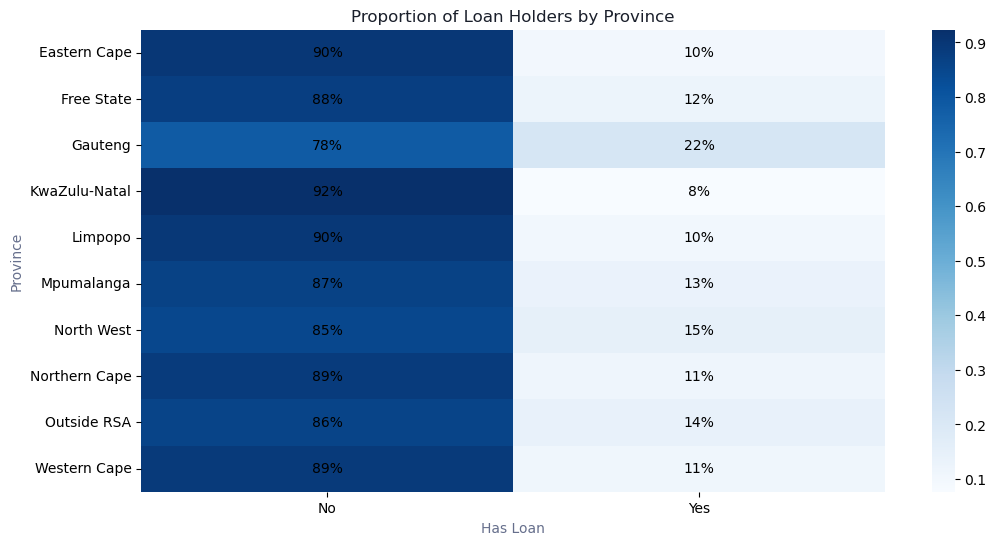

In [155]:
ct_province = pd.crosstab(data['Province'], data['Has_Loan'], normalize='index')

plt.figure(figsize=(12,6))
sns.heatmap(
    ct_province, 
    annot=True, 
    fmt=".0%", 
    cmap="Blues",
    annot_kws={"color": "black"} 
    
)
plt.title("Proportion of Loan Holders by Province", color=MONOCLE_COLORS['primary'])
plt.ylabel("Province", color=MONOCLE_COLORS['neutral3'])
plt.xlabel("Has Loan", color=MONOCLE_COLORS['neutral3'])
plt.show()


C:\Users\pales\AppData\Local\Temp\ipykernel_17184\4073534847.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


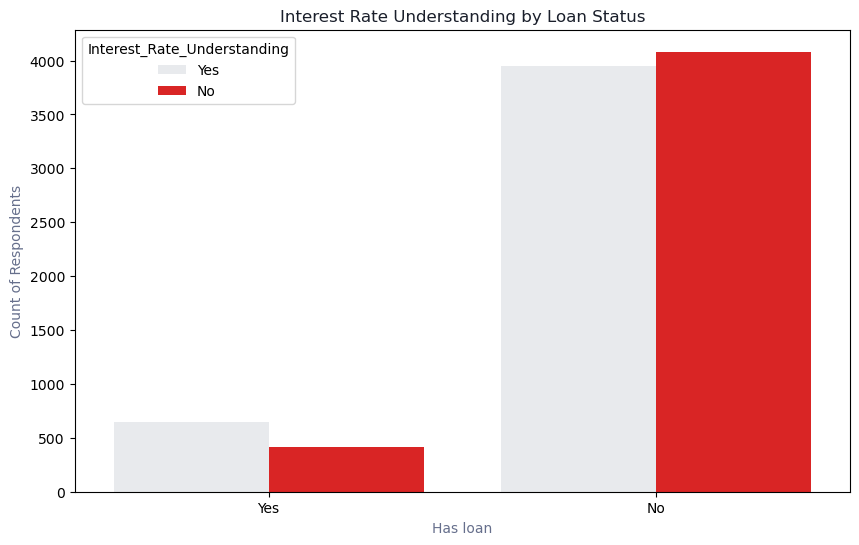

In [166]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=data, 
    x='Has_Loan', 
    hue='Interest_Rate_Understanding', 
    palette=[MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['danger'], MONOCLE_COLORS['neutral2']]
)
plt.title("Interest Rate Understanding by Loan Status", color=MONOCLE_COLORS['primary'])
plt.xlabel("Has loan", color=MONOCLE_COLORS['neutral3'])
plt.ylabel("Count of Respondents", color=MONOCLE_COLORS['neutral3'])
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_17184\3552186409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\pales\AppData\Local\Temp\ipykernel_17184\3552186409.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(


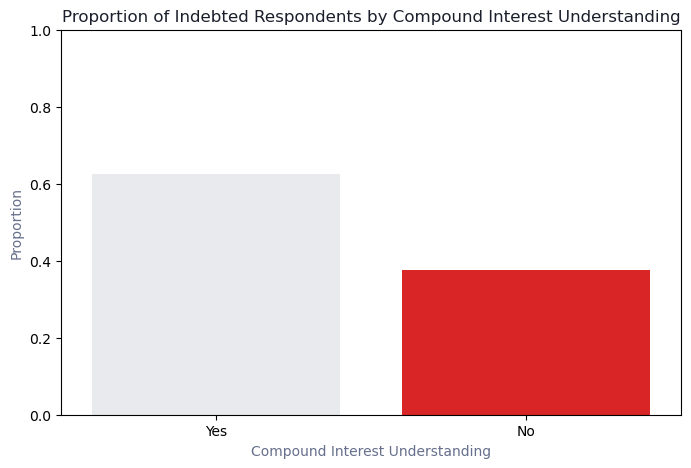

In [168]:
# Filter for indebted respondents
indebted = data[data['Has_Loan'] == 'Yes']

# Count proportion with each level of compound interest understanding
prop_indebted_ci = indebted['Compound_Interest_Understanding'].value_counts(normalize=True).reset_index()
prop_indebted_ci.columns = ['Compound_Interest_Understanding', 'Proportion']

plt.figure(figsize=(8,5))
sns.barplot(
    data=prop_indebted_ci,
    x='Compound_Interest_Understanding',
    y='Proportion',
    palette=[MONOCLE_COLORS['neutral1'], MONOCLE_COLORS['danger'], MONOCLE_COLORS['accent1']]
)
plt.title("Proportion of Indebted Respondents by Compound Interest Understanding", color=MONOCLE_COLORS['primary'])
plt.ylabel("Proportion", color=MONOCLE_COLORS['neutral3'])
plt.xlabel("Compound Interest Understanding", color=MONOCLE_COLORS['neutral3'])
plt.ylim(0,1)  # Shows proportion as 0–100%
plt.show()
